# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 


### Goals 

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Step-by-Step Examples


<figure>
 <img src="examples/undistort_output.png" width="60%" alt="Distortion Correction" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Distortion Correction </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/binary_combo_example.jpg" width="60%" alt="Binary Combo" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Edge Detection </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/warped_straight_lines.jpg" width="60%" alt="Perspective Transform" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Perspective Transform </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/color_fit_lines.jpg" width="60%" alt="Lane Fitting" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Lane Fitting </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/example_output.jpg" width="60%" alt="Expected Output" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Expected Output </p> 
 </figcaption>
</figure>
 <p></p> 



## IPython Notebook Configuration

In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Camera calibration using chessboard images

Camera Calibration
> Parameters ...
> Setting up ...
> Running calibration on 20 images ...
 - file: camera_cal/calibration18.jpg
 - file: camera_cal/calibration9.jpg
 - file: camera_cal/calibration16.jpg
 - file: camera_cal/calibration14.jpg
 - file: camera_cal/calibration5.jpg
! cv2.findChessboardCorners was not able to process file: camera_cal/calibration5.jpg
 - file: camera_cal/calibration2.jpg
 - file: camera_cal/calibration11.jpg
 - file: camera_cal/calibration3.jpg
 - file: camera_cal/calibration17.jpg
 - file: camera_cal/calibration6.jpg
 - file: camera_cal/calibration7.jpg
 - file: camera_cal/calibration10.jpg
 - file: camera_cal/calibration19.jpg
 - file: camera_cal/calibration1.jpg
! cv2.findChessboardCorners was not able to process file: camera_cal/calibration1.jpg
 - file: camera_cal/calibration4.jpg
! cv2.findChessboardCorners was not able to process file: camera_cal/calibration4.jpg
 - file: camera_cal/calibration20.jpg
 - file: camera_cal/calibration13.jpg
 - file: cam

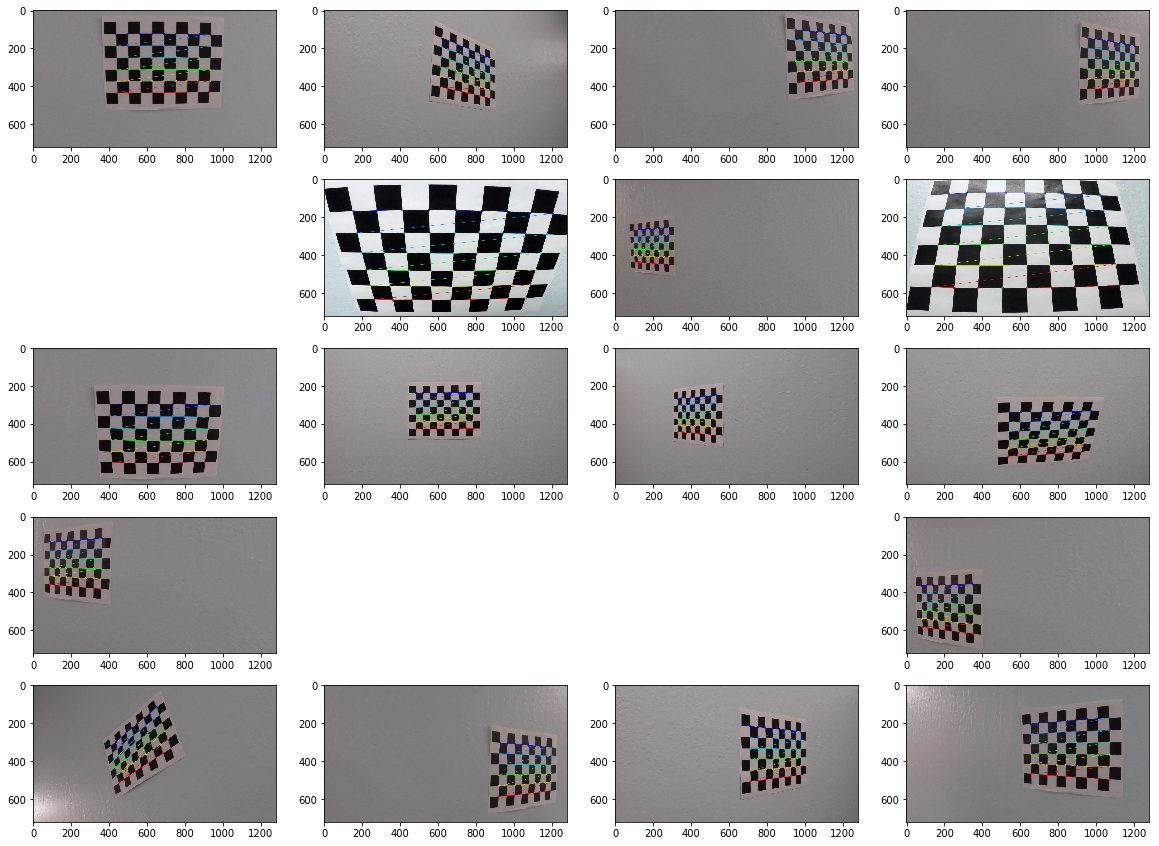

In [24]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

print("Camera Calibration")
print("==================")
print("> Parameters ...")
nx = 9
ny = 6
display_calibration = True

print("> Setting up ...")
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

if display_calibration:
    fig = plt.figure(1, figsize=(20, 15))

# Step through the list and search for chessboard corners
print("> Running calibration on %d images ..." % len(images))
cnt = 0
for fname in images:
    cnt = cnt + 1
    print(' - file: ' + fname)
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # If found, save object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
      
        if display_calibration:
            fig.add_subplot(5, 4, cnt)
            plt.imshow(img)
    else:
        print ('! cv2.findChessboardCorners was not able to process file: %s' % fname)
    
print("> Calibration Completed")
        
cv2.destroyAllWindows()